In [165]:
!python --version

Python 3.10.12


In [166]:
import sys
sys.version

'3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]'

In [167]:
!pip show pip

Name: pip
Version: 24.1.2
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: 
Author-email: The pip developers <distutils-sig@python.org>
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: fastai


In [168]:
import sys

if sys.version_info.major >= 3 and sys.version_info.minor >=10 and sys.version_info.micro >=0:
  print("correct python version")
else:
  print("please use python version 3.10.11 for kaggle and above colab")

correct python version


## importing book

In [169]:
  import numpy as np
  import pandas as pd
  import matplotlib
  import matplotlib.pyplot as plt

In [170]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.26.4
2.2.3
3.7.5


In [171]:
pip show requests

Name: requests
Version: 2.32.3
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bigframes, CacheControl, community, datasets, datashader, diffusers, docker, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, google-genai, h2o, huggingface-hub, id, jupyterlab_server, kaggle, kaggle-environments, kagglehub, keras-tuner, langchain, langsmith, libpysal, moviepy, music21, nilearn, pandas-datareader, panel, papermill, pooch, pymystem3, ray, requests-oauthlib, requests-toolbelt, sigstore, spacy, Sphinx, tensorflow, tensorflow-datasets, tiktoken, transformers, tsfresh, tuf, tweepy, update-checker, wandb, weasel, ydata-profiling, yfinance
Note: you may need to restart the kernel to use updated packa

In [172]:
def download_book_from_web(url):
    import requests

    try:
        response = requests.get(url)
        response.encoding = 'utf-8'  # Set encoding

        # Check if the request was successful
        if response.status_code == 200:
            raw_book_text = response.text  # Store the text in a variable

            # Save to file (optional)
            with open('raw_book.txt', 'w', encoding='utf-8') as f:
                print('Book downloaded successfully!')
                f.write(raw_book_text)

            return raw_book_text  # Return the variable for further use
        else:
            print(f"Failed to fetch book text. Status code: {response.status_code}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error downloading book: {e}")
        return None

In [173]:
url = 'https://www.gutenberg.org/files/244/244-0.txt'
raw_book_text=download_book_from_web(url)

Book downloaded successfully!


In [174]:
raw_book_text[:1000]

'\ufeffThe Project Gutenberg eBook of A Study In Scarlet, by Arthur Conan Doyle\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: A Study In Scarlet\r\n\r\nAuthor: Arthur Conan Doyle\r\n\r\nRelease Date: April, 1995 [eBook #244]\r\n[Most recently updated: April 18, 2023]\r\n\r\nLanguage: English\r\n\r\nProduced by: Roger Squires and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I.

In [175]:
import re

text = raw_book_text
# Extract Title (handles possible line breaks and extra spaces)
title_match = re.search(r'Title:\s*(.*?)(?=\s*\r?\nAuthor:|\r?\n\r?\n|$)', text, re.IGNORECASE | re.DOTALL)
title = title_match.group(1).strip() if title_match else None

# Extract Author (handles possible line breaks and extra spaces)
author_match = re.search(r'Author:\s*(.*?)(?=\s*\r?\nRelease Date:|\r?\n\r?\n|$)', text, re.IGNORECASE | re.DOTALL)
author = author_match.group(1).strip() if author_match else None

print("Title:", title)
print("Author:", author)

Title: A Study In Scarlet
Author: Arthur Conan Doyle


## stripping content of book between start and end
### means removing header footer metadata

In [176]:
import re

def remove_metadata(raw_book_text):
    """Removes Project Gutenberg header/footer, strictly cutting at end markers."""

    # Case-insensitive start/end markers with flexible patterns
    start_pattern = r"\*\*\*.*?START OF (?:THIS|THE) PROJECT GUTENBERG EBOOK.*?\*\*\*"
    end_pattern = r"\*\*\*.*?END OF (?:THIS|THE) PROJECT GUTENBERG EBOOK.*?\*\*\*"

    # Find start and end markers using regex
    start_match = re.search(start_pattern, raw_book_text, re.IGNORECASE)
    end_match = re.search(end_pattern, raw_book_text, re.IGNORECASE)

    if start_match and end_match:
        # Get positions
        start_pos = start_match.end()  # Start right after the start marker
        end_pos = end_match.start()    # End right before the end marker

        # Extract content between markers and strip whitespace
        return raw_book_text[start_pos:end_pos].strip()

    return raw_book_text  # Return original if markers not found

In [177]:
remove_metadata=remove_metadata(raw_book_text)


In [178]:
remove_metadata[:1000]

'A STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I. MR. SHERLOCK HOLMES.\r\n CHAPTER II. THE SCIENCE OF DEDUCTION.\r\n CHAPTER III. THE LAURISTON GARDENS MYSTERY\r\n CHAPTER IV. WHAT JOHN RANCE HAD TO TELL.\r\n CHAPTER V. OUR ADVERTISEMENT BRINGS A VISITOR.\r\n CHAPTER VI. TOBIAS GREGSON SHOWS WHAT HE CAN DO.\r\n CHAPTER VII. LIGHT IN THE DARKNESS.\r\n\r\n PART II. THE COUNTRY OF THE SAINTS\r\n CHAPTER I. ON THE GREAT ALKALI PLAIN.\r\n CHAPTER II. THE FLOWER OF UTAH.\r\n CHAPTER III. JOHN FERRIER TALKS WITH THE PROPHET.\r\n CHAPTER IV. A FLIGHT FOR LIFE.\r\n CHAPTER V. THE AVENGING ANGELS.\r\n CHAPTER VI. A CONTINUATION OF THE REMINISCENCES OF JOHN WATSON, M.D.\r\n CHAPTER VII. THE CONCLUSION.\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET.\r\n\r\n\r\n\r\n\r\nPART I.\r\n\r\n\r\n(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,\r\n_Late of the Army Medical Department._)\r\n\r\n\r\n\r\n\r\nCHAPTER I.\

In [179]:
remove_metadata[-1000:-1]

' British soil. It is an\r\nopen secret that the credit of this smart capture belongs entirely to\r\nthe well-known Scotland Yard officials, Messrs. Lestrade and Gregson.\r\nThe man was apprehended, it appears, in the rooms of a certain Mr.\r\nSherlock Holmes, who has himself, as an amateur, shown some talent in\r\nthe detective line, and who, with such instructors, may hope in time to\r\nattain to some degree of their skill. It is expected that a testimonial\r\nof some sort will be presented to the two officers as a fitting\r\nrecognition of their services.”\r\n\r\n“Didn’t I tell you so when we started?” cried Sherlock Holmes with a\r\nlaugh. “That’s the result of all our Study in Scarlet: to get them a\r\ntestimonial!”\r\n\r\n“Never mind,” I answered, “I have all the facts in my journal, and the\r\npublic shall know them. In the meantime you must make yourself\r\ncontented by the consciousness of success, like the Roman miser—\r\n\r\n\r\n“‘Populus me sibilat, at mihi plaudo\r\nIpse d

## stripping only_text_book

In [ ]:

# # Example usage
# text = raw_text_book
# pattern = r"CHAPTER\s*,?\n+"

# result = find_occurrence(text, pattern)
# if result:
#     start, end, matched = result
#     print(f"Second occurrence starts at {start}, ends at {end}")
#     print(f"Matched text: {repr(matched)}")
# else:
#     print("Pattern doesn't appear at least twice")

In [ ]:
stripping_only_text=remove_metadata[934:]
stripping_only_text[:500]

## removing chapters and titles 

In [ ]:
# import pandas as pd
# import re

# text=raw_book_text
# match_object=re.finditer("CHAPTER",txt)
# print(match_object)

# matches = list(re.finditer(pattern, text, flags=re.IGNORECASE))
# if len(matches) >= 2:
#     match = matches[1]
#     return (match.start(), match.end(), match.group())
# return None

In [ ]:
import re


# Remove chapter titles (adjust regex based on your book's format)
cleaned_text = re.sub(r'CHAPTER [IVXLCDM]+\s*\n.*?\n', '', stripping_only_text)  # Removes "CHAPTER I \nTITLE\n"
cleaned_text = re.sub(r'PART [A-Z]+\s*\n.*?\n', '', cleaned_text)  # Removes "PART FIRST \n..."



In [ ]:
cleaned_text[:1100]

In [ ]:
# Save cleaned text
with open("cleaned_text.txt", "w", encoding="utf-8") as f:
    f.write(cleaned_text)

## finalizing cleaned_text

In [180]:
# Save cleaned text
with open("/kaggle/input/interactive-literarycharacters-ai/cleaned_book.txt", "r", encoding="utf-8") as f:
 cleaned_text=f.read()

In [181]:
cleaned_text[:2000]

'\ufeff\n\nIn the year 1878 I took my degree of Doctor of Medicine of the\nUniversity of London, and proceeded to Netley to go through the course\nprescribed for surgeons in the army. Having completed my studies there,\nI was duly attached to the Fifth Northumberland Fusiliers as Assistant\nSurgeon. The regiment was stationed in India at the time, and before I\ncould join it, the second Afghan war had broken out. On landing at\nBombay, I learned that my corps had advanced through the passes, and\nwas already deep in the enemy’s country. I followed, however, with many\nother officers who were in the same situation as myself, and succeeded\nin reaching Candahar in safety, where I found my regiment, and at once\nentered upon my new duties.\n\nThe campaign brought honours and promotion to many, but for me it had\nnothing but misfortune and disaster. I was removed from my brigade and\nattached to the Berkshires, with whom I served at the fatal battle of\nMaiwand. There I was struck on the s

## minor fixes line break Normalize spaces

In [182]:
import re

def clean_text(text):
    # Fix line-break artifacts
    text = re.sub(r'\r\n', ' ', text)
   
    # Normalize spaces
    text = re.sub(r' +', ' ', text)
    return text.strip()

In [183]:
cleaned_text=clean_text(cleaned_text)

## stopwords removal

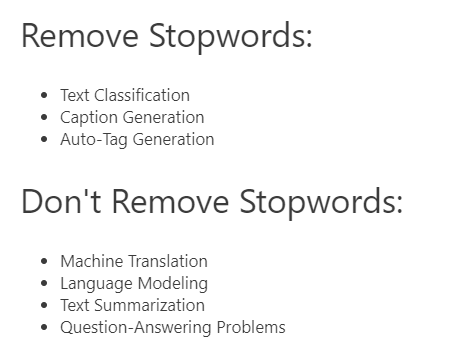

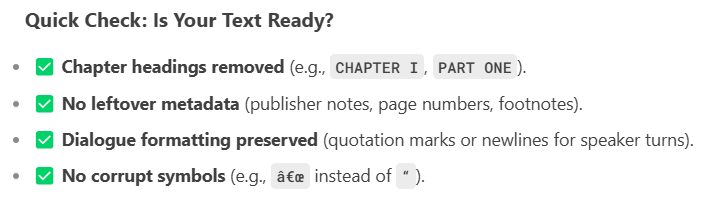

## lowering the text

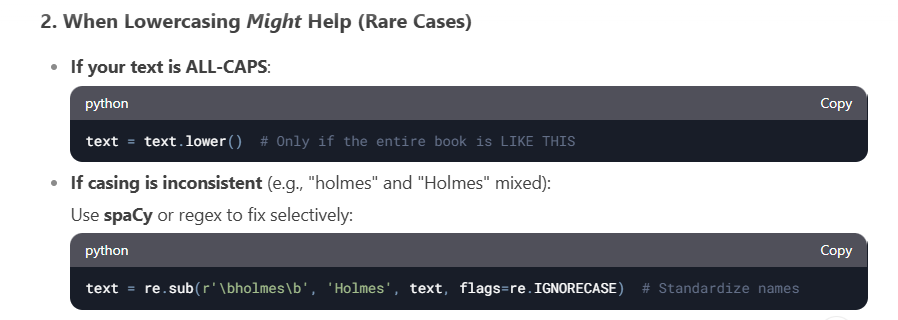

## wordcloud

In [184]:
!pip install wordcloud

In [185]:
pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: ydata-profiling
Note: you may need to restart the kernel to use updated packages.


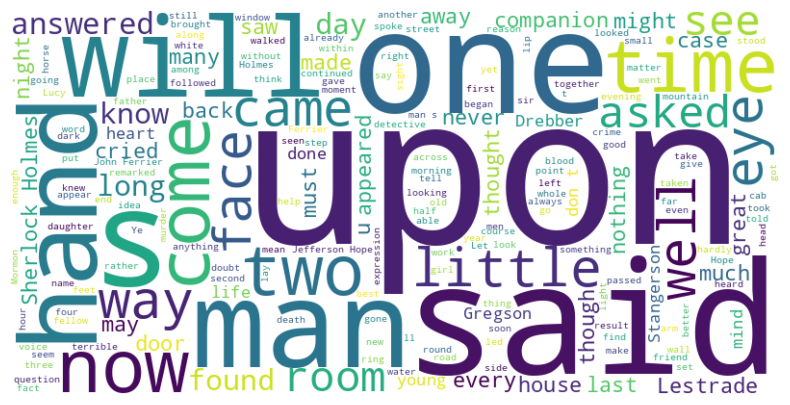

In [186]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# performing booknlp

## nlp pipline used to process long txt like books

In [187]:
#installing java
!apt-get update
!apt-get install -y openjdk-11-jdk
!update-alternatives --set java /usr/lib/jvm/java-11-openjdk-amd64/jre/bin/java

# Verify Java installation
!java -version

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]                
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease                                    
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease                                              
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease                                      
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,772 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.sta

In [188]:
!javac -version

javac 11.0.26


In [192]:
# Install dependencies
!git clone https://github.com/booknlp/booknlp.git
%cd booknlp
#download all thingsthat all listed in setup.py
#dowload all requriments in editable files and . represent present working directory
!pip install -e .


Cloning into 'booknlp'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 75 (delta 12), reused 6 (delta 6), pack-reused 50 (from 1)
Receiving objects: 100% (75/75), 7.60 MiB | 15.28 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/kaggle/working/booknlp/booknlp/booknlp
Obtaining file:///kaggle/working/booknlp/booknlp/booknlp
  Preparing metadata (setup.py) ... done
  Attempting uninstall: booknlp
    Found existing installation: booknlp 1.0.7
    Uninstalling booknlp-1.0.7:
      Successfully uninstalled booknlp-1.0.7
  Running setup.py develop for booknlp


In [189]:
# Install BookNLP and its dependencies

!pip install "booknlp==1.0.7"

In [190]:
!pip show booknlp

Name: booknlp
Version: 1.0.7
Summary: 
Home-page: https://github.com/dbamman/book-nlp
Author: David Bamman
Author-email: dbamman@berkeley.edu
License: MIT
Location: /kaggle/working/booknlp
Editable project location: /kaggle/working/booknlp
Requires: spacy, tensorflow, torch, transformers
Required-by: 


In [191]:
!pip show spacy

Name: spacy
Version: 3.7.5
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: booknlp, en-core-web-sm, fastai


In [193]:
!pwd

/kaggle/working/booknlp/booknlp/booknlp


In [194]:
import booknlp
print(booknlp.__file__)  # This gives the package location

/kaggle/working/booknlp/booknlp/__init__.py


## code error fixing for booknlp library

In [195]:
import os
os.chdir("/kaggle/working/")

!wget https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/booknlp_libary_updated_files.zip

--2025-03-25 18:26:31--  https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/booknlp_libary_updated_files.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mohdabuzaransari9/Interactive-literary-characters-ai/main/booknlp_libary_updated_files.zip [following]
--2025-03-25 18:26:32--  https://raw.githubusercontent.com/mohdabuzaransari9/Interactive-literary-characters-ai/main/booknlp_libary_updated_files.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7625 (7.4K) [application/zip]
Saving to: ‘booknlp_libary_updated_files.zip.1’

booknlp_libary_upda 100%[==========

In [196]:
#verify file
!file booknlp_libary_updated_files.zip

booknlp_libary_updated_files.zip: Zip archive data, at least v1.0 to extract, compression method=store


In [197]:
#unzip
from zipfile import ZipFile
zip_ref=ZipFile(r"/kaggle/working/booknlp_libary_updated_files.zip")
zip_ref.extractall()
zip_ref.close()


In [198]:
import os


for root, dirs, files in os.walk("/kaggle/working/files_update_for_booknlp_library"):
  for dir_name in dirs:
    print(os.path.join(root, dir_name))
  for file_name in files:
    print(os.path.join(root, file_name))


/kaggle/working/files_update_for_booknlp_library/bert_qa.py
/kaggle/working/files_update_for_booknlp_library/entity_tagger.py
/kaggle/working/files_update_for_booknlp_library/entity_cat.tagset
/kaggle/working/files_update_for_booknlp_library/litbank_coref.py


In [199]:
import pathlib# p is small

data_dir=pathlib.Path("/kaggle/working/files_update_for_booknlp_library")

file_names=[class_names.name for class_names in data_dir.glob('*')]
file_names

['bert_qa.py', 'entity_tagger.py', 'entity_cat.tagset', 'litbank_coref.py']

In [200]:
import shutil
import os

# Define the source files
source_files = [
    "/kaggle/working/files_update_for_booknlp_library/litbank_coref.py",
    "/kaggle/working/files_update_for_booknlp_library/bert_qa.py",
    "/kaggle/working/files_update_for_booknlp_library/entity_tagger.py",
    "/kaggle/working/files_update_for_booknlp_library/entity_cat.tagset"
]

destination = "/kaggle/working/booknlp/booknlp/english"  #  path

os.makedirs(destination, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination)
        print(f"updating library files {file_path} to {destination}")
    else:
        print(f"File not found: {file_path}")

updating library files /kaggle/working/files_update_for_booknlp_library/litbank_coref.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/bert_qa.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/entity_tagger.py to /kaggle/working/booknlp/booknlp/english
updating library files /kaggle/working/files_update_for_booknlp_library/entity_cat.tagset to /kaggle/working/booknlp/booknlp/english


In [201]:
!pwd

/kaggle/working


## running small sample

In [202]:
!ls /kaggle/working

booknlp				    cleaned_txt.txt
booknlp_libary_updated_files.zip    files_update_for_booknlp_library
booknlp_libary_updated_files.zip.1  raw_book.txt
booknlp_sample_output


## If Murray isn’t tagged as a character, we may need to tweak the NER model.

In [217]:
os.chdir("/kaggle/working/booknlp/booknlp")

# importing booknlp class
from booknlp.booknlp import BookNLP





In [218]:
model_params={
		"pipeline":"entity,quote",
		"model":"big",
        "book_id" : "a_study_in_scarlet"
    	}

In [205]:
with open('/kaggle/working/cleaned_txt.txt',"w",encoding='utf-8') as file:
    file.write(cleaned_text)

In [206]:
from IPython.display import FileLink
FileLink('/kaggle/working/cleaned_txt.txt')

/kaggle/working/cleaned_txt.txt

In [220]:
os.chdir("/kaggle/working/")

booknlp=BookNLP("en",model_params=model_params)

# Input and output paths
input_file = "/kaggle/working/cleaned_txt.txt"  # Adjust the path if your file is in a different directory
output_dir = "/kaggle/working/booknlp_sample_output"  # Output will be saved in the working directory
book_id = "a_study_in_scarlet"  # Use underscores or avoid spaces for compatibility

# Ensure the output directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your processing code here (e.g., running BookNLP or other text processing)
# Example: Print the input file path and output directory for verification
print(f"Input file: {input_file}")
print(f"Output directory: {output_dir}")
print(f"Book ID: {book_id}")

{'pipeline': 'entity,quote', 'model': 'big', 'book_id': 'a_study_in_scarlet'}
--- startup: 5.896 seconds ---
Input file: /kaggle/working/cleaned_txt.txt
Output directory: /kaggle/working/booknlp_sample_output
Book ID: a_study_in_scarlet


# 6 min processing

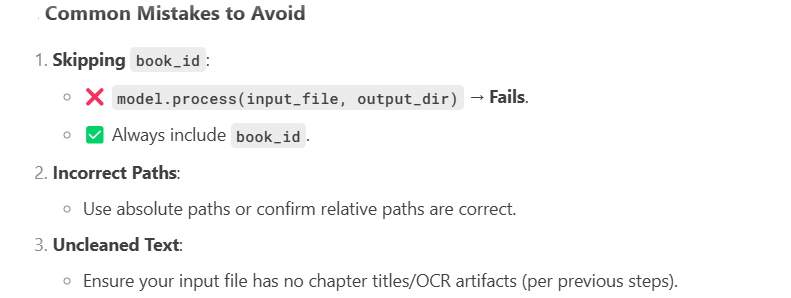

In [209]:
%%time
# Process the book
booknlp.process(input_file, output_dir,book_id)

--- spacy: 7.697 seconds ---
--- entities: 98.388 seconds ---
--- quotes: 0.111 seconds ---
--- attribution: 253.731 seconds ---
--- name coref: 0.144 seconds ---
--- TOTAL (excl. startup): 364.943 seconds ---, 51963 words
CPU times: user 10min 42s, sys: 33.7 s, total: 11min 16s
Wall time: 6min 4s


In [210]:
# List output files
import os
print(os.listdir(output_dir))

['a_study_in_scarlet.entities', 'a_study_in_scarlet.quotes', 'a_study_in_scarlet.tokens']


## final showdown running full pipeline 🤗

In [221]:
os.chdir("/kaggle/working/booknlp/booknlp")

# importing booknlp class
from booknlp.booknlp import BookNLP


In [225]:
model_params={
		"pipeline":"entity,quote,supersense,event,coref",
		"model":"big",
        "book_id" : "a_study_in_scarlet"
	}


In [226]:
# Input and output paths
input_file = "/kaggle/working/cleaned_txt.txt"  # Adjust the path if your file is in a different directory
output_dir = "/kaggle/working/booknlp_output"  # Output will be saved in the working directory
book_id = "a_study_in_scarlet"  # Use underscores or avoid spaces for compatibility

# Ensure the output directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your processing code here (e.g., running BookNLP or other text processing)
# Example: Print the input file path and output directory for verification
print(f"Input file: {input_file}")
print(f"Output directory: {output_dir}")
print(f"Book ID: {book_id}")

Input file: /kaggle/working/cleaned_txt.txt
Output directory: /kaggle/working/booknlp_output
Book ID: a_study_in_scarlet


# this will take long time approx 18-20 min

In [ ]:
%%time
# Process the book
booknlp.process(input_file, output_dir,book_id)

--- spacy: 8.148 seconds ---


## The output from the BookNLP pipeline is three types of files:


1.   TSV files (.tokens, .entities, .quotes, .supersense),
2.   JSON file (.book)
3.   HTML file (.book.html)

## **download the output files**

In [ ]:
from IPython.display import FileLink
FileLink('/kaggle/working/cleaned_text.txt')

In [ ]:
from IPython.display import FileLink
FileLink('/kaggle/working/raw_book.txt')

## **Zipping the booknlp_output folder**

### !zip -r file_name.zip "foldername"

###   -r standsfor recursive

In [ ]:
!zip -r booknlp_output.zip '/kaggle/working/booknlp_output'

In [ ]:
from IPython.display import FileLink
FileLink('/kaggle/working/booknlp_output.zip')

## **creating dataframe**

In [211]:
df_entities = pd.read_csv("/kaggle/working/booknlp_sample_output/a_study_in_scarlet.entities", delimiter="\t")
df_entities

,COREF,start_token,end_token,prop,cat,text
0,0,5,5,PRON,PER,I
1,0,7,7,PRON,PER,my
2,1,14,17,PROP,FAC,the University of London
3,2,17,17,PROP,GPE,London
4,3,22,22,PROP,GPE,Netley
...,...,...,...,...,...,...
7510,-1,51918,51919,NOM,PER,the public
7511,-1,51927,51927,PRON,PER,you
7512,-1,51930,51930,PRON,PER,yourself
7513,-1,51939,51941,NOM,PER,the Roman miser


In [212]:
df_quotes = pd.read_csv("/kaggle/working/booknlp_sample_output/a_study_in_scarlet.quotes", delimiter="\t")
df_quotes

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,quote_start,quote_end,mention_start,mention_end,mention_phrase,char_id,quote
0,392,395,365.0,367.0,a medical board,-1.0,"“ Orontes , ”"
1,736,747,748.0,748.0,he,-1.0,"“ Whatever have you been doing with yourself ,..."
2,763,778,748.0,748.0,he,-1.0,“ You are as thin as a lath and as brown as a ...
3,803,807,808.0,808.0,he,-1.0,“ Poor devil ! ”
4,821,829,814.0,814.0,he,-1.0,“ What are you up to now ? ”
...,...,...,...,...,...,...,...
881,51861,51872,51874.0,51875.0,Sherlock Holmes,106.0,“ Did n’t I tell you so when we started ? ”
882,51880,51898,51904.0,51904.0,I,0.0,“ That ’s the result of all our Study in Scarl...
883,51899,51903,51904.0,51904.0,I,0.0,"“ Never mind , ”"
884,51907,51942,51874.0,51875.0,Sherlock Holmes,106.0,"“ I have all the facts in my journal , and the..."


In [214]:
df_quotes = pd.read_csv("/kaggle/working/booknlp_sample_output/a_study_in_scarlet.quotes", delimiter="\t")
df_quotes

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,quote_start,quote_end,mention_start,mention_end,mention_phrase,char_id,quote
0,392,395,365.0,367.0,a medical board,-1.0,"“ Orontes , ”"
1,736,747,748.0,748.0,he,-1.0,"“ Whatever have you been doing with yourself ,..."
2,763,778,748.0,748.0,he,-1.0,“ You are as thin as a lath and as brown as a ...
3,803,807,808.0,808.0,he,-1.0,“ Poor devil ! ”
4,821,829,814.0,814.0,he,-1.0,“ What are you up to now ? ”
...,...,...,...,...,...,...,...
881,51861,51872,51874.0,51875.0,Sherlock Holmes,106.0,“ Did n’t I tell you so when we started ? ”
882,51880,51898,51904.0,51904.0,I,0.0,“ That ’s the result of all our Study in Scarl...
883,51899,51903,51904.0,51904.0,I,0.0,"“ Never mind , ”"
884,51907,51942,51874.0,51875.0,Sherlock Holmes,106.0,"“ I have all the facts in my journal , and the..."


In [ ]:
df_entities = pd.read_csv("/kaggle/working/booknlp_output/a_scarlet_study.entities", delimiter="\t")
df_entities

In [ ]:
df_supersense = pd.read_csv('/content/booknlp/booknlp_output/a_scarlet_study.supersense', delimiter="\t")
df_supersense

In [ ]:
df_quotes = pd.read_csv("/kaggle/working/booknlp_output/a_scarlet_study.quotes", delimiter="\t")
df_quotes

In [ ]:
print(os.listdir("/kaggle/working//booknlp_output"))

In [213]:
import pandas as pd

# Load data with explicit dtype handling
quotes = pd.read_csv(
    "booknlp_output/quotes.csv",
    dtype={
        'char_id': 'Int64',  # Handles NaN as <NA>
        'quote_start': 'int64',
        'quote_end': 'int64'
    }
)

# Rule-based speaker disambiguation (SAFE version)
def predict_speaker(quote_text, mention_phrase):
    if isinstance(quote_text, str) and isinstance(mention_phrase, str):
        holmes_keywords = ["elementary", "deduction", "Holmes"]
        watson_keywords = ["medical", "doctor", "I proceeded"]
        if any(word in quote_text for word in holmes_keywords):
            return "Sherlock Holmes"
        elif any(word in mention_phrase for word in watson_keywords):
            return "Dr. Watson"
    return "Unknown"

# Apply safely
quotes["resolved_speaker"] = quotes.apply(
    lambda x: predict_speaker(
        str(x.get("quote", "")), 
        str(x.get("mention_phrase", ""))
    ),
    axis=1
)

# Save with proper numeric formatting
quotes.to_csv("resolved_quotes.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'booknlp_output/quotes.csv'

In [ ]:
!pip install transformers accelerate

In [ ]:
!pip install huggingface_hub

In [ ]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("HF_TOKEN")


In [ ]:
import huggingface_hub
huggingface_hub.login(secret_value_0)

In [ ]:
from transformers import AutoModelForCausalLM, BitsAndBytesConfig
import torch

In [ ]:
import torch
print(torch.version.cuda)  # Prints the CUDA version (e.g., '11.8')
print(torch.cuda.is_available())  # Should return True


In [ ]:
pip install bitsandbytes==0.43.1

In [ ]:
# Load a 4-bit quantized model
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,    # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 for computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for memory efficiency
)

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.1",
    quantization_config=quantization_config,
    device_map="auto"  # Automatically assigns layers to available GPUs
)

In [ ]:
print(model)

In [ ]:
# !pip install git+https://github.com/TimDettmers/bitsandbytes.git


## how to download kaggle output input directory files

In [ ]:
# from IPython.display import FileLink
# FileLink('/kaggle/working/cleaned_txt.txt')

## kaggle how to delete a working directory file¶

In [ ]:
# import os

# # Delete a single file
# os.remove("/kaggle/working/cleaned_text.txt")  # Replace with your filename

#  Check if file exists before deleting (optional)
# if os.path.exists("/kaggle/working/cleaned_text.txt"):
#     os.remove("/kaggle/working/cleaned_text.txt")
# else:
#     print("File does not exist.")

## deleting a folder

In [ ]:
# # removing a directory
# import shutil

# # Delete an entire directory and its contents
# shutil.rmtree("/kaggle/working/booknlp_output")  # Use with caution!